<a href="https://colab.research.google.com/github/iamchenchu/Deep-Learnig-with-TensorFlow/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Introduction to neural network classification with TensorFlow**

In this notebook we're going to learn how to write nueral networks for classification problems

A few types of classification problems :  

  * Binary Classification
  * Multiclass classification
  * Multilabel classification
  



**Creating a data to view and fit**

In [1]:
from sklearn.datasets import make_circles

#Make 1000 examples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
#Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

our data is a little hard to understand right now...let's visualize it


In [4]:
import pandas as pd

circles = pd.DataFrame({"X0" :X[:, 0], "X1" : X[:, 1], "label" : y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


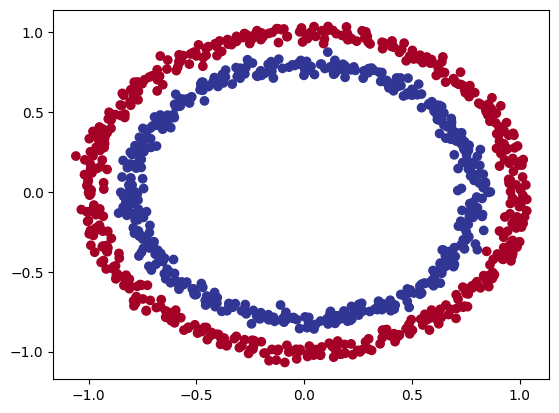

In [5]:
#visualize this with a plot

import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1],c=y,cmap = plt.cm.RdYlBu)

**Learning Tip :**

Before pushing forward, spend 10-minutes playing around with [playground.tensorflow.](https://playground.tensorflow.org/)org building and running different neural networks. See what happens when you change different hyperparameters.


In [6]:
#Input and Output shapes of our neural networks

X.shape, y.shape

((1000, 2), (1000,))

In [7]:
#Check how many samples we are working with
len(X), len(y)

(1000, 1000)

In [8]:
#View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [9]:
import tensorflow as tf

tf.__version__

'2.14.0'

**STEPS IN MODELING WITH TENSORFLOW:**

* Now we are working with binary classification here in this case
* Create the model
* Compile the model
* Fit the model
* Evaluate the model
* Tweak
* Evaluate





In [10]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)


Epoch 1/5
32/32 [==============================] - 1s 5ms/step - loss: 5.3247 - accuracy: 0.4640
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 5.0795 - accuracy: 0.4610
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 5.0511 - accuracy: 0.4680
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 4.4153 - accuracy: 0.4670
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 3.6323 - accuracy: 0.4750


In [11]:
#Let's try and improve our model for longer and see

model_1.fit(X, y, epochs = 200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 1s 6ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on binary classification problem and our model is getting around 50% accuracy, it's performing as if it's guessing

so let's step things up a notch and add extra layer

In [12]:
# Set random seee
tf.random.set_seed(42)

#1. Create Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0) # set verbose=0 to make the output print less



In [13]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 1s 8ms/step - loss: 0.6947 - accuracy: 0.5000


[0.6946940422058105, 0.5]

**Improving the model**

Let's look in to our bag of trics to improve our model

1. Create Model  - Add more layers and increase or decrease and increase the hidden units
2. Compile a model - Can change the SGD() to Adam
3. Fitting a model - Train for more time, increase the number of epochs




In [14]:
#Setting the random seed
tf.random.set_seed(42)

#1. Create Model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

#3. Fit the Model
model_3.fit(X,y, epochs = 100, verbose = 0)

In [15]:
#4. Evaluate the model
model_3.evaluate(X,y)     # still 50% accuracy we are getting the output


32/32 [==============================] - 1s 6ms/step - loss: 0.6953 - accuracy: 0.5060


[0.695260763168335, 0.5059999823570251]

In [16]:
model_3.predict(X)

32/32 [==============================] - 1s 9ms/step


array([[0.49503613],
       [0.54020333],
       [0.5428095 ],
       [0.5481952 ],
       [0.4641647 ],
       [0.55033064],
       [0.5401111 ],
       [0.49146077],
       [0.48733026],
       [0.55142474],
       [0.5113805 ],
       [0.5230793 ],
       [0.54443276],
       [0.4752632 ],
       [0.47030777],
       [0.4769914 ],
       [0.527992  ],
       [0.47856095],
       [0.5329828 ],
       [0.5040916 ],
       [0.5069866 ],
       [0.5593674 ],
       [0.47529325],
       [0.49719125],
       [0.5560512 ],
       [0.5476193 ],
       [0.5369466 ],
       [0.4788351 ],
       [0.47470948],
       [0.47291413],
       [0.48795518],
       [0.553651  ],
       [0.5386953 ],
       [0.47915033],
       [0.47487733],
       [0.5605377 ],
       [0.5493199 ],
       [0.5222175 ],
       [0.47535726],
       [0.5101393 ],
       [0.5016277 ],
       [0.53302044],
       [0.5087757 ],
       [0.47542453],
       [0.51611066],
       [0.5269144 ],
       [0.4690131 ],
       [0.531

To visualize our model predictions, let's create a function 'plot_decision_boundary()', this function will

* Take in the trained model, features(X), and abels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones(Where each unique class falls)



In [17]:
import numpy as np

In [18]:

import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 2s 8ms/step
doing binary classifcation...


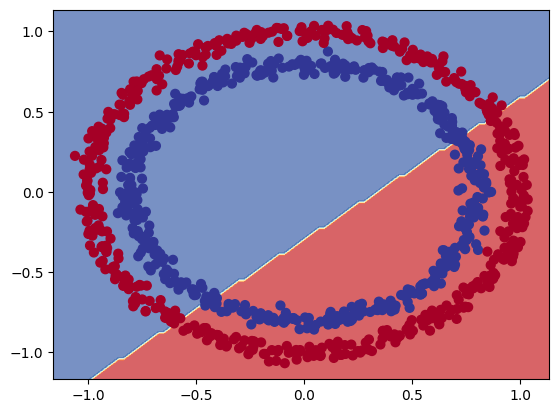

In [19]:
# Check out the predictions our model is making
plot_decision_boundary(model = model_3,
                       X=X,
                       y=y)

In [20]:
i# Let's see if our model can be used for regression model

tf.random.set_seed(42)

#Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

#split the data into training and test sets
X_reg_train = X_regression[ :150]
X_reg_test = X_regression[150: ]

y_reg_train = y_regression[ :150]
y_reg_test = y_regression[150 : ]

#fit the model to the regression model data
model_3.fit(X_reg_train, y_reg_train, epochs =100)

Epoch 1/100


ValueError: ignored

Ohhh...wait now we compiled our model for binary classification problem but now we are working on regression problem, let's change the model to suit our model.


In [21]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 7ms/step - loss: 376.0447 - mae: 376.0447
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 264.4526 - mae: 264.4526
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 156.5353 - mae: 156.5353
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 54.8860 - mae: 54.8860
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 71.6222 - mae: 71.6222
Epoch 6/100
5/5 [==============================] - 0s 11ms/step - loss: 77.5526 - mae: 77.5526
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 50.7917 - mae: 50.7917
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 48.7888 - mae: 48.7888
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 45.5609 - mae: 45.5609
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 44.1837 - mae: 44.1837
Epoch 11/100
5/5 [==============================] - 

2/2 [==============================] - 0s 5ms/step


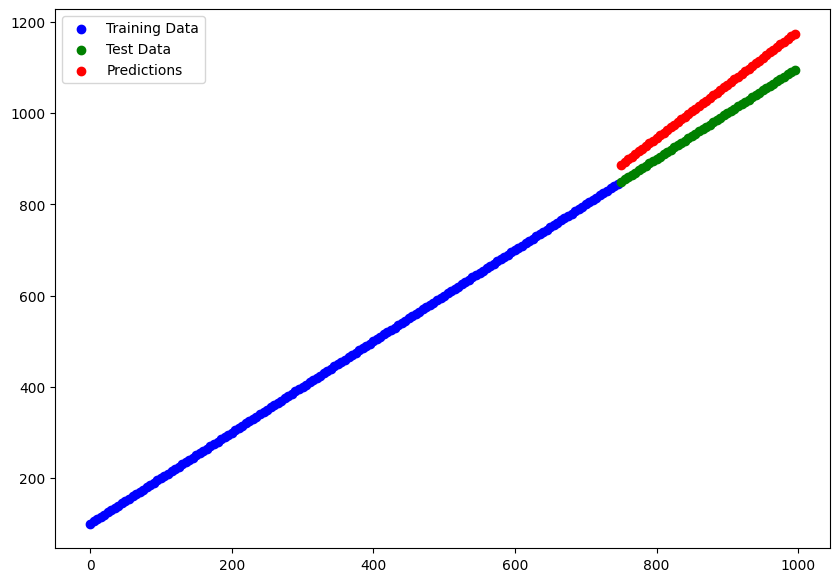

In [22]:
# Make predictions with our trained model

y_reg_preds = model_3.predict(X_reg_test)

#Plot the model's prediction against our regression data
plt.figure(figsize =(10,7))
plt.scatter(X_reg_train, y_reg_train, c='b', label = "Training Data")
plt.scatter(X_reg_test, y_reg_test, c= 'g', label = "Test Data")
plt.scatter(X_reg_test, y_reg_preds, c = "r", label = "Predictions")
plt.legend();

## The missing peace : Non - **Leniearity**

In [24]:
#set the random seed
tf.random.set_seed(42)

#1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy']) # can also write it as loss = tf.keras.losses.BinaryCrossentropy

#3. Fit the model
history = model_4.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3340 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 3.2685 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.7144 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.4370 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3845 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3434 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3086 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2766 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2483 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2218 - accuracy: 0.5000
Epoch 11/

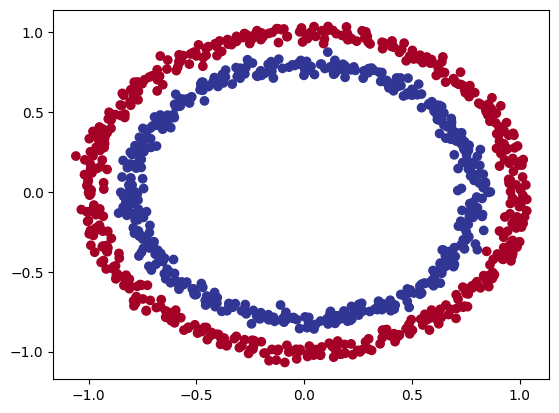

In [25]:
# Check out our data

plt.scatter(X[:, 0], X[:, 1], c=y, cmap =plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


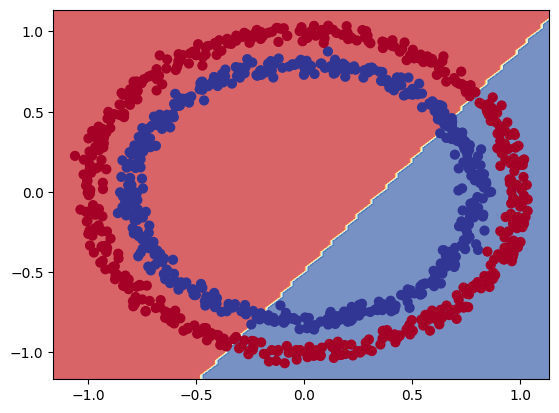

In [26]:
#Check the decision boundary

plot_decision_boundary(model_4, X=X, y=y)

**Let's try to build our first neural network with non linear activation function**

In [27]:
#Set random seed

tf.random.set_seed(42)

#1. Create a model with non linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.relu )
])

#2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"])
#Fit the model

hostory = model_5.fit(X,y, epochs =100)



Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.8083 - accuracy: 0.4890
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7706 - accuracy: 0.4870
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7539 - accuracy: 0.4870
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7216 - accuracy: 0.4870
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 5.7030 - accuracy: 0.4880
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 5.6990 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 5.6285 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 5.5684 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 5.5662 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5463 - accuracy: 0.4850
Epoch 11/

In [34]:
#Time to replicate the multilayer neural network from the TensorFlow playground

#Set the random seed
tf.random.set_seed(42)

#1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"])

#3. Fit the model
history = model_6.fit(X, y, epochs =250)

Epoch 1/250
32/32 [==============================] - 2s 6ms/step - loss: 5.3822 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 1s 16ms/step - loss: 4.9798 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 4.6891 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 3.5747 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 2.9092 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 2.8176 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 2.7821 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 2.5860 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 1.5220 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 1.1570 - accuracy: 0.5000
Epoch 11

In [35]:
#Evaluate the model

model_6.evaluate(X,y)

32/32 [==============================] - 1s 2ms/step - loss: 0.6375 - accuracy: 0.5110


[0.637505292892456, 0.5109999775886536]

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


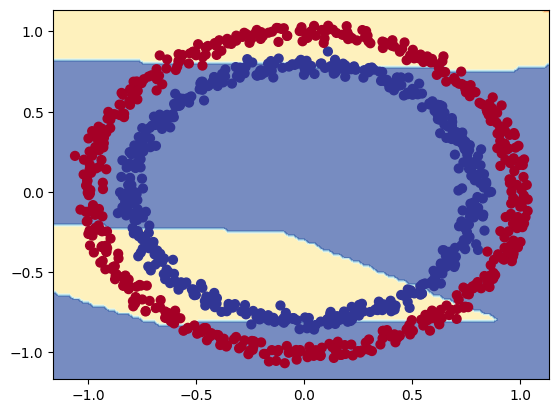

In [36]:
#Visualize the model prediction to have better idea

plot_decision_boundary(model_6,X,y)

In [47]:
#Let's create another model

#Set the ranodm seed
tf.random.set_seed(42)

#1. Create the Model with multiple layers and multiple activation functions and multiple activation functions
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])
#2. Compile the model
model_7.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ["accuracy"])

#3. Fit the model
history = model_7.fit(X, y, epochs = 150)



Epoch 1/150
32/32 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.4990
Epoch 2/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5120
Epoch 3/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.5170
Epoch 4/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5210
Epoch 5/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6871 - accuracy: 0.5300
Epoch 6/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5490
Epoch 7/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5610
Epoch 8/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.5740
Epoch 9/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.6040
Epoch 10/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5820
Epoch 11/

In [48]:
#4. Evaluate the model

model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2446 - accuracy: 0.9890


[0.24464693665504456, 0.9890000224113464]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


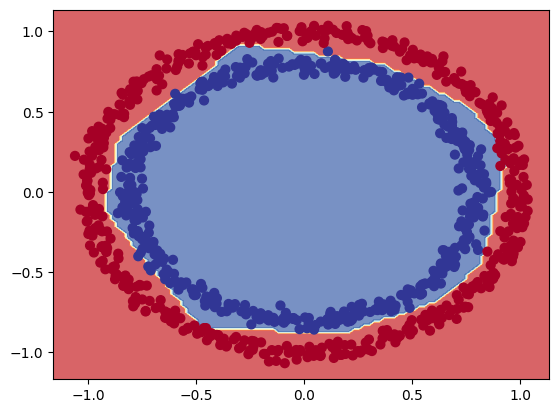

In [49]:
#Let's visualize classification

plot_decision_boundary(model_7, X, y)

**Question:** What's wrong the predictions we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we predict on?

**Note:** The combination of linear (straight lines) and non-linear (non-straight lines) functions is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [51]:
# Create a toy tensor (Similar to the data we pass into our models)

A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

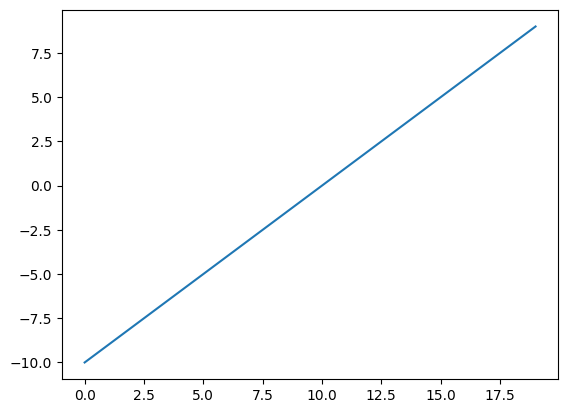

In [53]:
#Visualize our toy tensor
plt.plot(A)

In [54]:
# Let's start by replicating sigmoid - sigmoid(X) = 1 / (1 + exp(-x))

def sigmoid(x) :
  return 1/(1+tf.exp(-x))

#Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

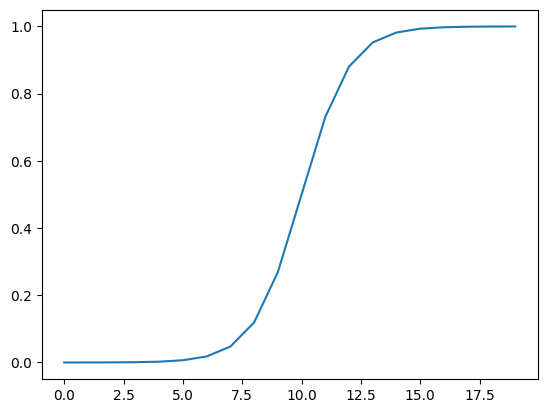

In [57]:
#plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [58]:
#Let's recreate the Relu Function

def relu(x):
  return tf.maximum(0,x)

#Let's pass our toy tensor to the relu
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

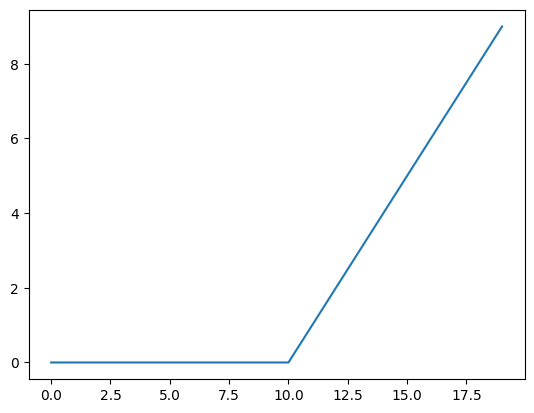

In [59]:
#Let's visualize the relu with tensor

plt.plot(relu(A))

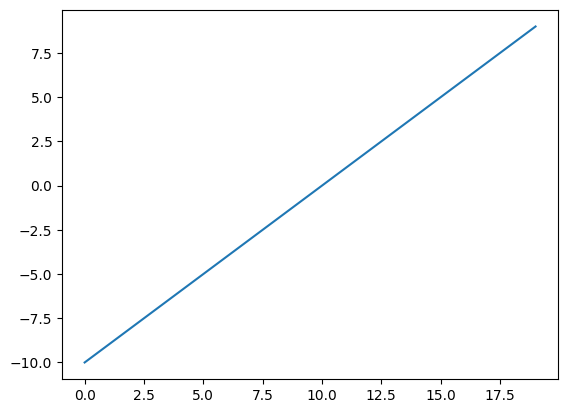

In [60]:
plt.plot(A)

In [62]:
#Let's try the linear activation function
# It returns the unmodified value

tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

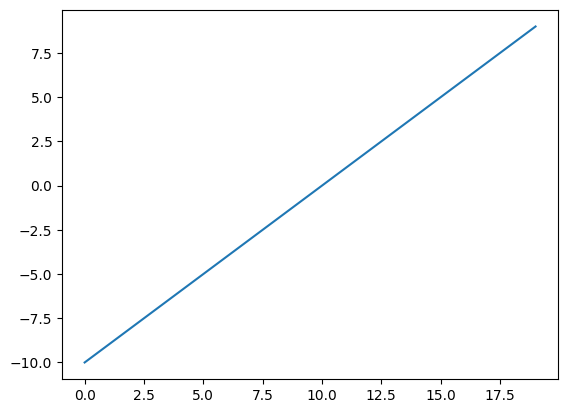

In [63]:
#Let's draw the same for the completeness

plt.plot(tf.keras.activations.linear(A))

In [64]:
A == tf.keras.activations.linear(A) # This did not change so it should return the true

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

**Evaluating and Improving our classification model**

So far we have been training and testing on the same dataset...

Howeer, in machine learning this is a sin

So let's create a training and test set


In [65]:
len(X)

1000

In [66]:
#Split the data into train and test sets

X_train, y_train = X[ :800], y[ :800]
X_test, y_test = X[ 800:], y[800: ]

X_train.shape,X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [71]:
#Let's recreate the model to fit on the training data and evaluate on the testset

#Set the random seed
tf.random.set_seed(42)

#1.Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

#2. Compile the model

model_8.compile(loss = "binary_crossentropy", #tf.keras.losses.binary_crossentropy
                optimizer = tf.keras.optimizers.Adam(lr=0.01),
                metrics = ["accuracy"])


#3.Fit the model
history = model_8.fit(X_train, y_train, epochs = 200)


Epoch 1/200
25/25 [==============================] - 2s 3ms/step - loss: 0.6861 - accuracy: 0.4988
Epoch 2/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6840 - accuracy: 0.5113
Epoch 3/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6827 - accuracy: 0.5175
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6818 - accuracy: 0.5225
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.5537
Epoch 6/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6802 - accuracy: 0.5688
Epoch 7/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.6112
Epoch 8/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6784 - accuracy: 0.6600
Epoch 9/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.6625
Epoch 10/200
25/25 [==============================] - 0s 3ms/step - loss: 0.6768 - accuracy: 0.6612
Epoch 11/

In [72]:
# 4. Evaluate he model on test dataset

model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0886 - accuracy: 0.9900


[0.0886497050523758, 0.9900000095367432]

313/313 [==============================] - 0s 2ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


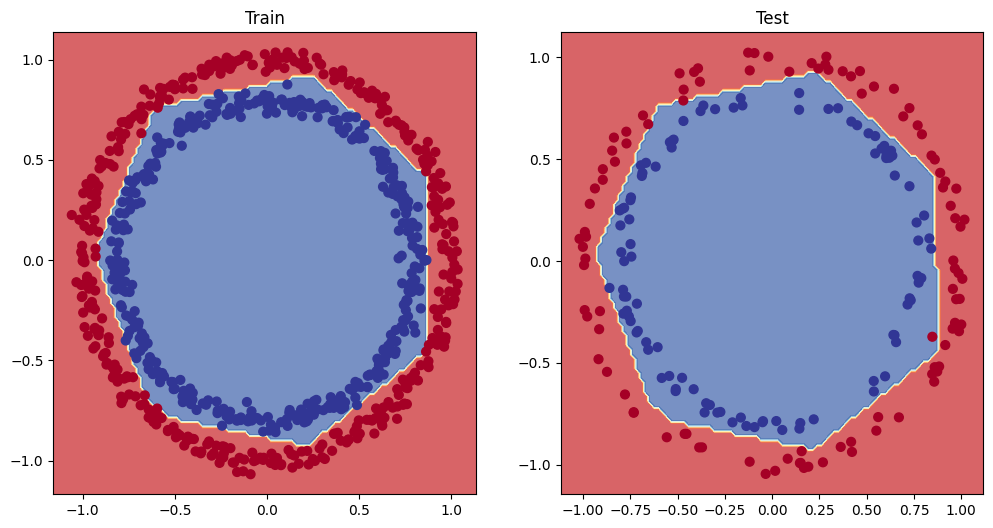

In [74]:
#Plot the decision boundary for the training and test sets

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X = X_test, y = y_test)
plt.show()

In [ ]:
# Plot the loss (or training) curves


In [76]:
history.history # tracks the accuracy and loss

{'loss': [0.6861376762390137,
  0.6840361952781677,
  0.6827021241188049,
  0.6817708611488342,
  0.6809656023979187,
  0.6801801323890686,
  0.6790584325790405,
  0.6784278750419617,
  0.6776984333992004,
  0.676842212677002,
  0.6761844158172607,
  0.6756438612937927,
  0.6746578216552734,
  0.6737534999847412,
  0.6731297373771667,
  0.6720978021621704,
  0.6715162396430969,
  0.6704668998718262,
  0.6699005961418152,
  0.6688094139099121,
  0.6678900718688965,
  0.6668570637702942,
  0.6659987568855286,
  0.6649929285049438,
  0.6640014052391052,
  0.6630248427391052,
  0.6620528697967529,
  0.6606757640838623,
  0.6597298979759216,
  0.6585834622383118,
  0.6574711799621582,
  0.6560701727867126,
  0.6548260450363159,
  0.6535215973854065,
  0.6525091528892517,
  0.6507698893547058,
  0.6494254469871521,
  0.6483089327812195,
  0.6465650200843811,
  0.6451389193534851,
  0.6433655619621277,
  0.6415534019470215,
  0.6398500204086304,
  0.6379879117012024,
  0.6361588835716248,
  0

In [77]:
#Make it a DataFrame
pd.DataFrame(history.history)


,loss,accuracy
0,0.686138,0.49875
1,0.684036,0.51125
2,0.682702,0.51750
3,0.681771,0.52250
4,0.680966,0.55375
...,...,...
195,0.084436,0.99625
196,0.084515,0.99500
197,0.083782,0.99625
198,0.082906,0.99500


Text(0.5, 1.0, 'Model_8 loss curves')

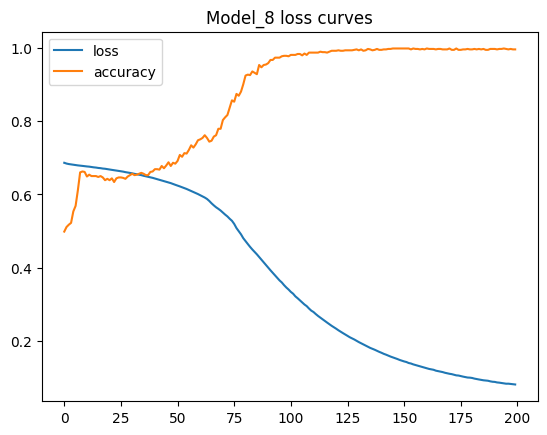

In [78]:
# Plot the loss cureves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves")

**Note** : For many functions, if the loss function is going down it means it is getting improving(The prediction it's making are ground truth tables)
